# Polynomial Regression

# Import libraries

In [39]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression

In [40]:
df=pd.DataFrame({
    'x':list(range(-100,100,5))
})
df.head()

,x
0,-100
1,-95
2,-90
3,-85
4,-80


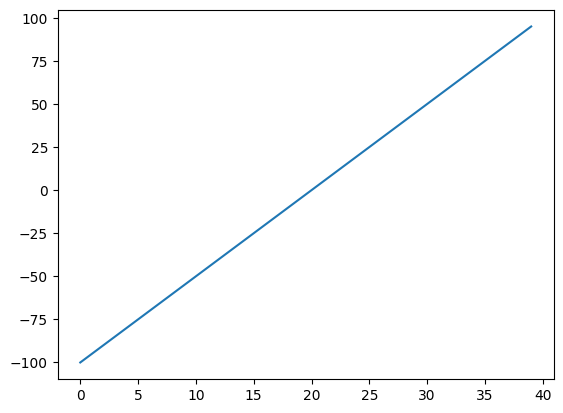

In [41]:
plt.plot(df['x'])

In [42]:
df['x2']=df['x']**2
df['x3']=df['x']**3
df['x4']=df['x']**4
df

,x,x2,x3,x4
0,-100,10000,-1000000,100000000
1,-95,9025,-857375,81450625
2,-90,8100,-729000,65610000
3,-85,7225,-614125,52200625
4,-80,6400,-512000,40960000
5,-75,5625,-421875,31640625
6,-70,4900,-343000,24010000
7,-65,4225,-274625,17850625
8,-60,3600,-216000,12960000
9,-55,3025,-166375,9150625


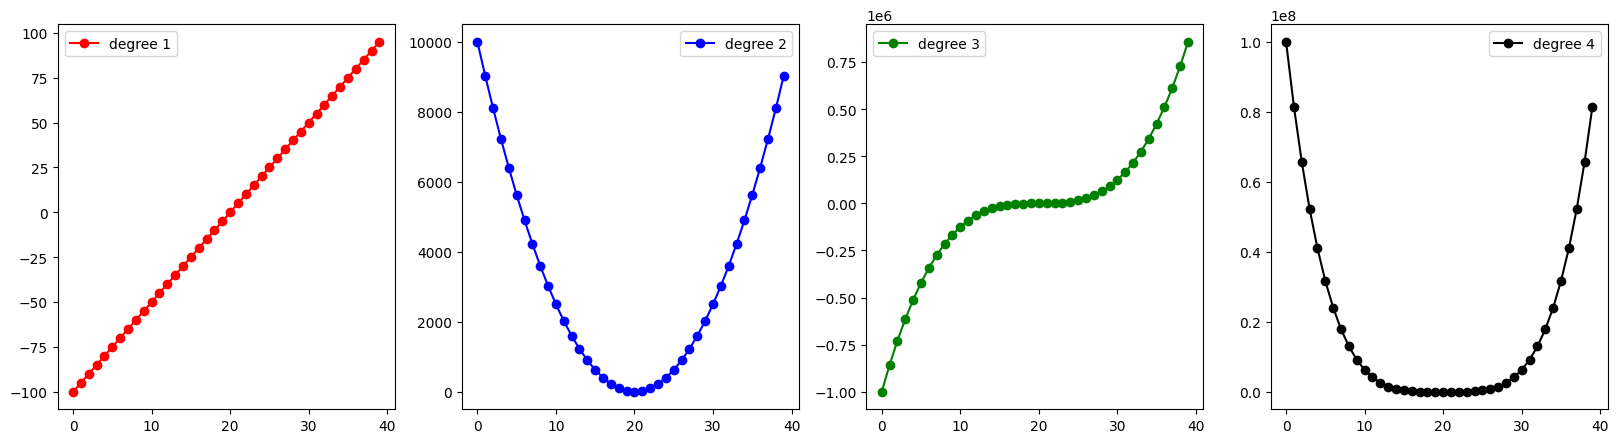

In [44]:
fig,(ax1,ax2,ax3,ax4)=plt.subplots(1,4, figsize=(20,5))
ax1.plot(df['x'],color='red',label='degree 1',marker='o')
ax2.plot(df['x2'],color='blue',label='degree 2',marker='o')
ax3.plot(df['x3'],color='green',label='degree 3',marker='o')
ax4.plot(df['x4'],color='black',label='degree 4',marker='o')
ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
plt.show()

# Import data

In [ ]:
# Get dataset
df = pd.read_csv('Position_Salaries.csv')
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


# Analyze data

## Describe

In [ ]:
# Describe data
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


## Distribution

C:\Users\ASUS PC\AppData\Local\Temp\ipykernel_8820\2202558658.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Salary'])


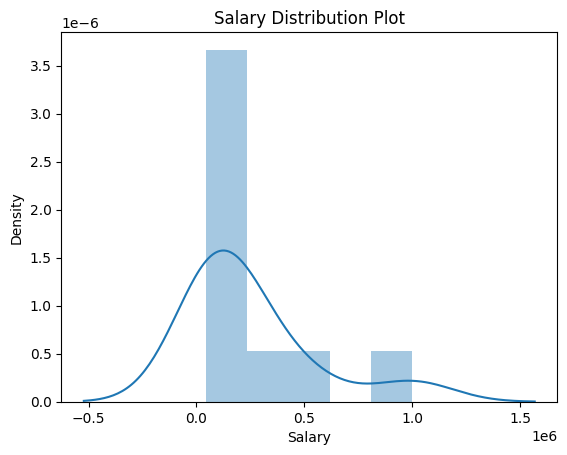

In [ ]:
# Data distribution
plt.title('Salary Distribution Plot')
sns.distplot(df['Salary'])
plt.show()

## Relation between Salary and Level

It is clearly visible now, our data varies like a polynomial parabolic curve. That means an individual's Salary grows exponentially as their Level increases.

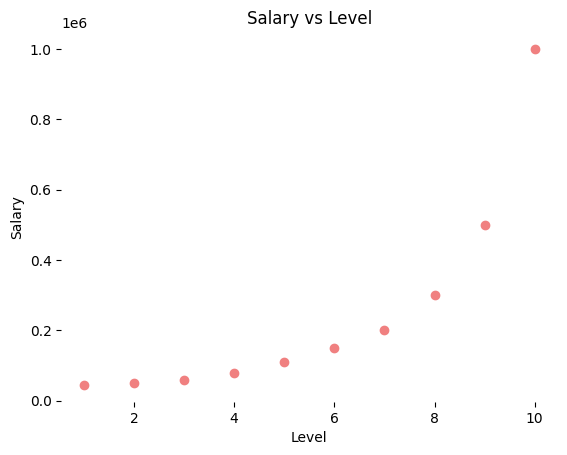

In [ ]:
# Relationship between Salary and Level
plt.scatter(df['Level'], df['Salary'], color = 'lightcoral')
plt.title('Salary vs Level')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.box(False)
plt.show()

# Split data into Independent/Dependent variables

In [ ]:
# Splitting variables
X = df[['Level']]  # independent
y = df['Salary']    # dependent

In [ ]:
print(y)

0      45000
1      50000
2      60000
3      80000
4     110000
5     150000
6     200000
7     300000
8     500000
9    1000000
Name: Salary, dtype: int64


# Train model

## Linear Regression

In [ ]:
# Train linear regression model on whole dataset
lr = LinearRegression()
lr.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## Polynomial Regression

In [ ]:
# Train polynomial regression model on the whole dataset
pr = PolynomialFeatures(degree = 10)
X_poly = pr.fit_transform(X)
lr_2 = LinearRegression()
lr_2.fit(X_poly, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


# Predict results

In [ ]:
# Predict results
y_pred_lr = lr.predict(X)           # Linear Regression
y_pred_poly = lr_2.predict(X_poly)  # Polynomial Regression

# Visualize predictions

## Prediction with Linear Regression

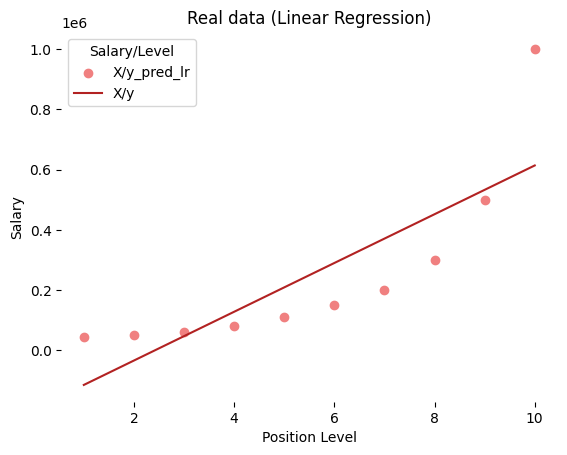

In [ ]:
# Visualize real data with linear regression
plt.scatter(X, y, color = 'lightcoral')
plt.plot(X, lr.predict(X), color = 'firebrick')
plt.title('Real data (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend(['X/y_pred_lr', 'X/y'], title = 'Salary/Level', loc='best', facecolor='white')
plt.box(False)
plt.show()

## Prediction with Polynomial Regression

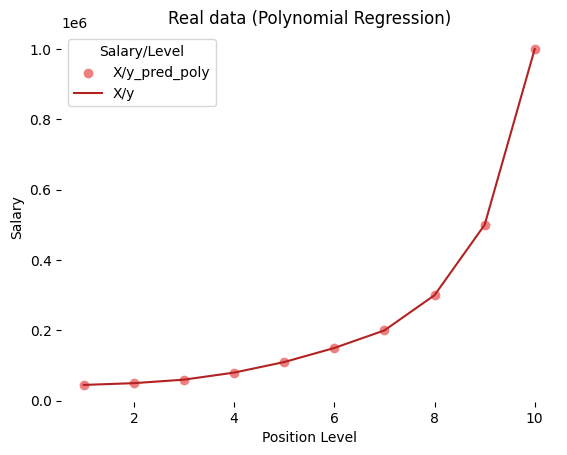

In [ ]:
# Visualize real data with polynomial regression
# X_grid = np.arange(min(X), max(X), 0.1)
# X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'lightcoral')
plt.plot(X, lr_2.predict(X_poly), color = 'firebrick')
plt.title('Real data (Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend(['X/y_pred_poly', 'X/y'], title = 'Salary/Level', loc='best', facecolor='white')
plt.box(False)
plt.show()

# Test with an example

In [ ]:
# Predict a new result with linear regression
print(f'Linear Regression result : {lr.predict([[6.5]])}')

# Predict a new result with polynomial regression
print(f'Polynomial Regression result : {lr_2.predict(pr.fit_transform([[6.5]]))}')

Linear Regression result : [330378.78787879]
Polynomial Regression result : [172421.91682061]


c:\Users\ASUS PC\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
